## Lab - Random Forest

In this lab, you will work with the Heart dataset to predict whether the patient has AHD or not.
The dataset contains information about various patient with heart conditions including their age, sex and other medical parameters.
Your task is to fit a RandomForest ensemble model , and predict the value for AHD (yes or no) for the given data sample.
You are required to perform pre-processing train-test split,GridSearchCV to find the best parameters and create the model.
Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Heart.csv

"Some of the data in this lab are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " 

In [1]:
# Importing pandas
import pandas as pd

heart = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Heart.csv', na_values='?').dropna()
heart.info()
heart.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [2]:
# get dataset  
data_set = heart[["Age","MaxHR","AHD"]]


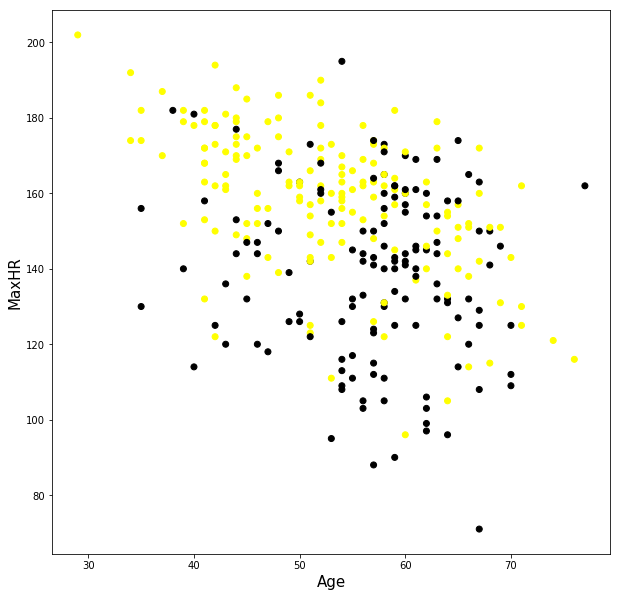

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import LabelEncoder


labels = LabelEncoder().fit_transform(data_set["AHD"].values) 
colors = ['yellow','black']
cmap= ListedColormap(colors)
plt.figure(figsize=(10,10))
plt.xlabel('Age', fontsize=15)
plt.ylabel('MaxHR', fontsize=15)
plt.scatter(data_set['Age'].values, data_set['MaxHR'].values, c=labels, cmap=cmap )


In [4]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split 
import numpy as np 

X = data_set[['Age','MaxHR']].values
y = labels.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print("y value min and max are : {},{}".format(min(y),max(y)))

y value min and max are : 0,1


y value min and max are : 0,1

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_features=2,max_depth=2, n_estimators=200, random_state=1,n_jobs=4)
y_pred = rf_clf.fit(X_train, y_train).predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("accuracy of the random forest classifier is {} ".format(acc))

accuracy of the random forest classifier is 0.7666666666666667 


accuracy of the random forest classifier is 0.7666666666666667 

In [6]:

def to_3d(x,y,plot_step=0.01): 
   

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    return xx, yy 

def plot_contour(xx,yy,Z): 
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    return cs

In [7]:

xx, yy = to_3d(X,y, plot_step=0.05)



In [8]:

Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


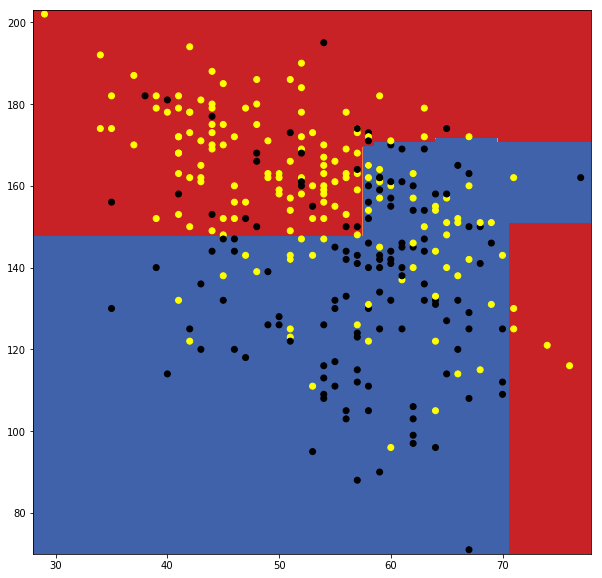

In [9]:
plt.figure(figsize=(10,10))
cmap= ListedColormap(colors)

_ = plot_contour(xx,yy, Z)
plt.scatter(data_set["Age"].values, data_set["MaxHR"].values, c=labels,cmap=cmap )
plt.show()

<img src="../../../images/rf_label_map.png"> 

Next is to get the feature importances. We have two features that we are working with, which one is plays a greater role in prediction. We can easily get this from a decision tree or random forest. In this lab, we will be calculating it for a random forest. 


In [10]:
feature_importances = rf_clf.feature_importances_
index_max = np.argmax(feature_importances)
training_set = data_set[['Age','MaxHR']]
most_important_feature = training_set.columns[index_max]
print("Most important feature of is {}".format(most_important_feature))


Most important feature of is MaxHR


Most important feature of is MaxHR